# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** I Putu Yogi Artha
- **Email:** yogiartha77@gmail.com
- **ID Dicoding:** yogi_artha

## Menentukan Pertanyaan Bisnis

1. Pertanyaan 1: Bagaimana jumlah hasil penjualan dari setiap product category?
2. Pertanyaan 2: Bagaimana hasil tren dari penjualan (order) setiap tahun?

## Import Semua Packages/Library yang Digunakan

In [121]:
import pandas as pd
import numpy as np
import folium

import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette for Seaborn
colors = ["#26536f",  "#749ca8", "#c78a4d", "#854927", "#3b96b7",  "#b6a98d"]
sns.set_palette(colors)

## Data Wrangling

### Gathering Data
***
- Dataset yang digunakan bernama **E-Commerce Public Dataset** yang dapat diunduh melalui link berikut: <br>
    - https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing
- Semua dataset memiliki format *.csv* yang bisa diload menggunakan _read_csv()_ dari pandas

In [122]:
# load semua file dari dataset
customers_df = pd.read_csv('data/customers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
products_df = pd.read_csv('data/products_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')

#### Customers Dataset

In [123]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Insights**
***
1. Identifikasi kolom:
    - **customer_id**: primary key untuk setiap order yang dibuat suatu customer
    - **customer_unique_id**: primary key setiap customer
    - customer_zip_code_prefix, customer_city, dan customer_state berkaitan dengan geolocation dataset yang menunjukkan informasi wilayah geografis dari setiap customer
2. **Customers Dataset** berisi 99.441 baris data dengan 5 kolom

#### Geolocation Dataset

In [124]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


**Insights**
***
1. Identifikasi kolom:
    - Semua kolom pada tabel ini berkaitan dengan informasi geografis yang nantinya bisa digunakan untuk berelasi dengan tabel **customers_df**, **sellers_df**, ataupun tabel-tabel lain yang memuat informasi geografis
    - Primary key *geolocation_zip_code_prefix* pada Tabel ini dapat digunakan untuk menggabungkan (join) tabel ini dengan tabel-tabel lain yang memiliki foreign key berupa *zip_code* yang sama dengan tabel ini
2. Jumlah data pada geolocation dataset yaitu 1.000.163 baris dengan 5 atribut

#### Order Items Dataset

In [125]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [126]:
order_items_df[
    order_items_df['order_id']=="ffb9a9cd00c74c11c24aa30b3d78e03b"
]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112533,ffb9a9cd00c74c11c24aa30b3d78e03b,1,fec565c4e3ad965c73fb1a21bb809257,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,89.9,18.34
112534,ffb9a9cd00c74c11c24aa30b3d78e03b,2,fec565c4e3ad965c73fb1a21bb809257,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,89.9,18.34
112535,ffb9a9cd00c74c11c24aa30b3d78e03b,3,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,129.9,18.49
112536,ffb9a9cd00c74c11c24aa30b3d78e03b,4,3321ad579f19476d0d668f726f8dffec,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,219.9,22.18


**Insights**
1. Identifikasi kolom:
    - _order_id_ berkaitan dengan primary key setiap order yang dibuat pada tabel **customers_df** kolom *customer_id*
    - *order_item_id*: berkaitan dengan primary key dari setiap item yang dipesan untuk suatu *order_id*. Nilai order_item_id dari setiap order dimulai dari indeks 1 (sequential number identifying number of items included in the same order.)
    - _product_id_ berkaitan dengan product yang dipesan yang kaitannya dengan tabel Products Dataset
    - _seller_id_ berkaitan dengan penjual dari product
    - *shipping_limit_date*: batas waktu kapan product tersebut mesti di shipping
    - *price*: harga product tersebut
    - *freight_value*: biaya pengiriman untuk product tersebut
2. Jumlah data pada order items dataset yaitu 112650 baris dengan 7 atribut

#### Order Payments Dataset

In [127]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Insights** <br>
1. Identifikasi kolom:
    - *order_id*: primary key dari setiap order yang terbentuk
    - *payment_sequential*: Seorang pelanggan dapat membayar pesanan dengan lebih dari satu metode pembayaran. Jika dia melakukannya, urutan pembayaran akan dibuat untuk
    - *payment_type*: tipe pembayaran
    - *payment_installments*: jumlah angsuran yang dipilih oleh pelanggan.
    - *payment_value*: nilai transaksi yang dilakukan
2. Jumlah data pada order payments dataset yaitu 103886 baris dengan 5 atribut

#### Order Reviews Dataset

In [128]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Insights** <br>
1. Identifikasi kolom:
    - *review_id*: primary key dari setiap review yang diberikan untuk suatu order
    - *order_id*: primary key dari setiap order
    - *review_score*: skala review yang diberikan
    - *review_comment_title*: judul komentar review yang diberikan
    - *review_comment_message*: pesan review teks yang diberikan
    - *review_creation_date*: informasi tanggal dan waktu kapan review tersebut dibuat
    - *review_answer_timestamps*: informasi tanggal dan waktu kapan review tersebut dijawab
2. Jumlah data pada order reviews dataset yaitu 99224 baris dengan 7 atribut

#### Order Dataset

In [129]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insights** <br>
1. Identifikasi kolom
    - Kolom *order_id* memiliki relasi dengan order yang dilakukan oleh setiap customer dan merupakan primary key
    - Kolom *customer_id* memiliki relasi dengan tabel customer dataset
    - Kolom *order_status* status dari order yang dilakukan customer
    - Kolom-kolom seperti *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, *order_estimated_delivery_date* berkaitan dengan informasi date time mengenai status order mulai dari transaksi dibayarkan hingga sampai ke customer
2. Jumlah data pada order dataset yaitu 99441 baris dengan 8 atribut

#### Product Category Name Translation Dataset

In [130]:
product_category_name_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Insights** <br>
1. Identifikasi kolom:
    - *product_category_name*: nama kategori produk (dalam bahasa Brasil) sesuai pada Tabel **products_df**
    - *product_category_name_english*: nama kategori produk dalam bahasa Inggris
2. Jumlah data pada product category name translation dataset yaitu 71 baris dengan 2 atribut

#### Products Dataset

In [131]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insights** <br>
1. Identifikasi kolom:
    - *product_id*: primary key dari setiap product
    - *product_category_name*: category dari product
    - sisa kolom menunjukkan deskripsi mengenai product tersebut, mulai dari panjang nama, panjang deskripsi produk, banyak foto dari product tersebut, dimensi product, massa product
2. Jumlah data pada products dataset yaitu 32951 baris dengan 9 atribut

#### Sellers Dataset

In [132]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**
1. Identifikasi kolom:
    - *seller_id*: primary key untuk setiap penjual
    - *seller_zip_code_prefix*, *seller_city*, dan *seller_state* berkaitan dengan informasi geografis dari penjual
2. Jumlah data pada products dataset yaitu 3095 baris dengan 4 atribut

### Assessing Data

In [133]:
tables_df = {
    'Customer': customers_df,
    'Geolocation': geolocation_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Order": orders_df,
    "Product Category Name Translation": product_category_name_translation_df,
    "Product Dataset": products_df,
    "Seller": sellers_df,
}

#### Check missing values

In [134]:
def check_missing_values(df, table_title):
    print(f"\t\tMissing values pada tabel {table_title}")
    print(df.isnull().sum())
    print("="*30)

for table_title, df in tables_df.items():
    check_missing_values(df, table_title)

		Missing values pada tabel Customer
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
		Missing values pada tabel Geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
		Missing values pada tabel Order Items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
		Missing values pada tabel Order Payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
		Missing values pada tabel Order Reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       

**Insights** <br>
- Dari hasil pengecekan missing values (**NaN**), terdapat beberapa tabel yang memuat missing values, diantaranya:
    - Order Reviews
    - Products

#### Check duplicate values

In [135]:
def check_duplicate_values(df, table_title):
    print(f"\t\tDuplicate values pada tabel {table_title}")
    print(f"Jumlah data duplikat: {df.duplicated().sum()}")
    print("="*30)

for table_title, df in tables_df.items():
    check_duplicate_values(df, table_title)

		Duplicate values pada tabel Customer


Jumlah data duplikat: 0
		Duplicate values pada tabel Geolocation
Jumlah data duplikat: 261831
		Duplicate values pada tabel Order Items
Jumlah data duplikat: 0
		Duplicate values pada tabel Order Payments
Jumlah data duplikat: 0
		Duplicate values pada tabel Order Reviews
Jumlah data duplikat: 0
		Duplicate values pada tabel Order
Jumlah data duplikat: 0
		Duplicate values pada tabel Product Category Name Translation
Jumlah data duplikat: 0
		Duplicate values pada tabel Product Dataset
Jumlah data duplikat: 0
		Duplicate values pada tabel Seller
Jumlah data duplikat: 0


**Insights** <br>
- Terdapat data duplikat pada tabel **Geolocation**

#### Check invalid values

In [136]:
def check_data_types(df, table_title):
    print(f"\t\tData types pada tabel {table_title}")
    print(df.info())
    print("="*30)

for table_title, df in tables_df.items():
    check_data_types(df, table_title)

		Data types pada tabel Customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
		Data types pada tabel Geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000

**Insights** <br>
- Hampir semua kolom pada setiap tabel memiliki format tipe data yang telah sesuai dengan nilai pada masing-masing kolom. Namun terdapat beberapa kolom dengan tipe data yang belum sesuai:
    - Kolom **review_creation_date** dan **review_answer_timestamp** pada Tabel **Order Reviews** seharusnya memiliki tipe data datetime, begitupun untuk kolom **shipping_limit_date** pada Tabel **Order Items** dan juga kolom **order_approved_at**, **order_delivered_carrier_date** dst pada Tabel Order

#### Check outliers

In [137]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
def check_outliers(df, table_title, columns_to_show):
    # Create a figure with subplots for each numerical column
    plt.figure(figsize=(12, 8))
    # Create boxplots for each numerical column
    for i, column in enumerate(df[columns_to_show].columns):
        plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns based on your data
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

    plt.suptitle(f"Outliers pada tabel {table_title}")

    plt.tight_layout()
    plt.show()
    print("="*30)

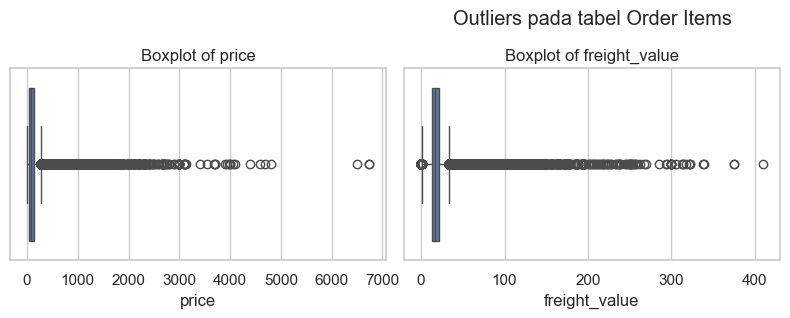

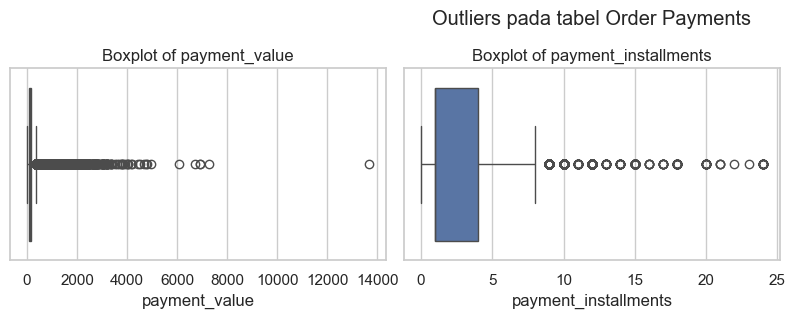

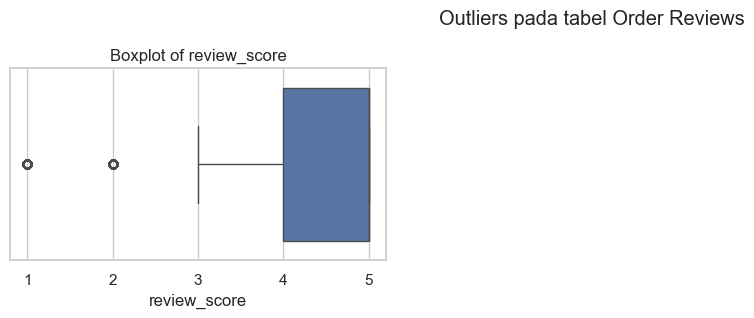

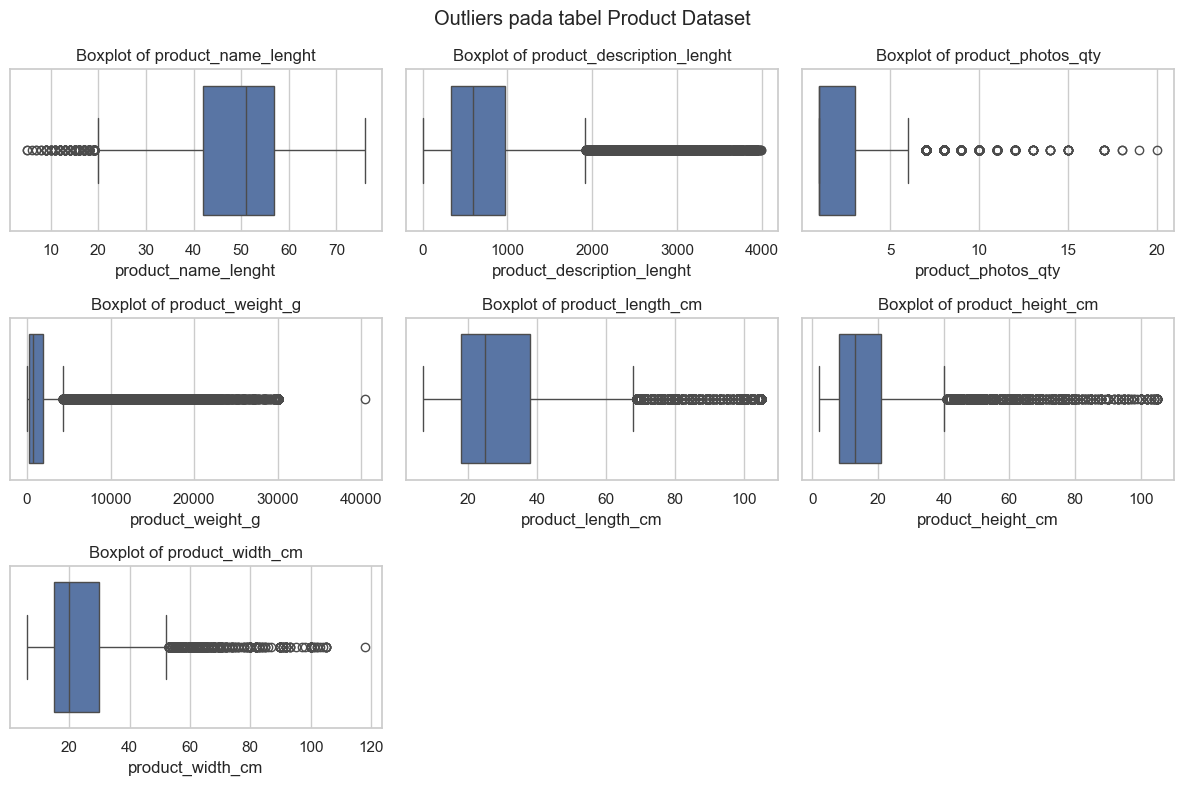

In [138]:
table_title_columns_df = {
    "Order Items": ['price', 'freight_value'],
    "Order Payments": ['payment_value', 'payment_installments'],
    "Order Reviews": ['review_score'],
    "Product Dataset": products_df.select_dtypes(include=['float64', 'int64']).columns,
}
for table_title, df in tables_df.items():
    if table_title in table_title_columns_df:
        check_outliers(df, table_title, table_title_columns_df[table_title])

**Insight:**
- Terlihat bahwa kolom numerik pada masing-masing tabel yang dicek terdapat outliers.
- Semua outliers pada kolom numerik pada masing-masing tabel tidak akan ditangani ataupun dihapus karena tujuan projek ini hanya analisis aja dan tidak membangun sebuah model prediksi dimana keberadaan outliers dapat mengganggu performa model.
- Ketika outliers itu dihapus akan mempengaruhi hasil analisis yang terjadi karena jumlah outliers pada masing-masing kolom cukup banyak (kepadatan titik hitam), sehingga jika nilai-nilai tersebut dihapus atau diubah maka mempengaruhi hasil analisis

### Cleaning Data

#### Change Data Types

In [139]:
# convert column to datetime data type
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_reviews_df['review_creation_date'] = pd.to_datetime(
    order_reviews_df['review_creation_date'],
    format='%Y-%m-%d', errors='coerce'
)
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(
    order_reviews_df['review_answer_timestamp'],
    format='%Y-%m-%d %H:%M:%S', errors='coerce'
)

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [140]:
check_data_types(orders_df, 'Order')

		Data types pada tabel Order
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [141]:
check_data_types(order_reviews_df, 'Order Reviews')

		Data types pada tabel Order Reviews
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     0 non-null      datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


In [142]:
check_data_types(order_items_df, 'Order Items')

		Data types pada tabel Order Items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


**Insights** <br>
- Kolom-kolom pada ketiga tabel tersebut yang seharusnya bertipe datetime kini sudah memiliki tipe data datetime

#### Handling missing values

##### Inputing missing values on Products Table
***
**Descriptions** <br>
- Nilai missing values pada tabel product sebesar **612** data relatif lebih sedikit dibandingkan jumlah seluruh baris data pada tabel Product yaitu **32.951**. Dibandingkan membuat nilai missing values tersebut, pada projek kali ini akan dilakukan teknik **Imputation**
- Missing values yang terdapat pada tabel ini terletak pada kolom dengan categorical (product_category_name) dan numerical (product_name_lenght, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm)
- Missing values pada kolom kategorikal akan diisi dengan nilai modus dari kolom tersebut dan missing value pada kolom numerikal akan diisi dengan teknik interpolation

In [143]:
products_categorical_columns = ['product_category_name']
products_numerical_columns = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm', 'product_width_cm'
]

In [144]:
# imputation with mode
for cat_column in products_categorical_columns:
    products_df[cat_column].fillna(value=products_df[cat_column].mode().values[0], inplace=True)

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\2960257567.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[cat_column].fillna(value=products_df[cat_column].mode().values[0], inplace=True)


In [145]:
# imputation with interpolation
for num_column in products_numerical_columns:
    products_df[num_column].interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\155243861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[num_column].interpolate(method='linear', limit_direction='forward', inplace=True)


In [146]:
check_missing_values(products_df, 'Products')

		Missing values pada tabel Products
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


Sudah tidak ada missing values pada tabel **Products**

##### Missing values on Table Order Reviews
***
- Missing value pada tabel order reviews tidak dilakukan penanganan apa-apa karena mayoritas missing values terletak pada kolom **review_comment_title** dan **review_comment_message**. Apabila data tersebut dihapus cukup banyak informasi yang hilang.
- Yang terpenting adalah kolom **review_score** untuk sementara tidak terdapat missing values

In [147]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,NaT,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,NaT,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,NaT,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,NaT,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,NaT,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,NaT,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,NaT,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",NaT,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,NaT,2018-07-02 12:59:13


#### Remove duplicate values
***
Proses ini hanya dilakukan untuk tabel **Geolocation** karena tabel tersebut saja yang mengandung data duplikat

In [148]:
geolocation_df.drop_duplicates(inplace=True)

In [149]:
check_duplicate_values(geolocation_df, 'Geolocation')

		Duplicate values pada tabel Geolocation
Jumlah data duplikat: 0


**Insight:**
- Dari proses tersebut sudah tidak ada data duplikat pada tabel **Geolocation**

#### Handling Outliers Values
***
- Outliers pada hasil pengecekan sebelumnya tidak akan ditangani apapun pada tahap ini karena tujuannya untuk mempertahankan keaslian data dan tidak mempengaruhi hasil analisis nantinya. Lagipula pada project kali ini belum diperuntukkan untuk membangun model prediksi berbasis machine learning dimana keberadaan outliers mungkin perlu diperhitungkan

## Exploratory Data Analysis (EDA)
***

### EDA on Customers

#### Quest: Customer paling banyak dan sedikit berasal dari city dan negara apa?

In [150]:
# karena customer_unique_id bisa melakukan beberapa kali transaksi (customer_id), maka data perlu digrup berdasarkan customer_unique_id juga
city_state_customer_counts = customers_df.groupby(['customer_unique_id','customer_city', 'customer_state'])[['customer_id']].count().reset_index()[
    ['customer_city', 'customer_state']
].value_counts()

In [151]:
# 10 city dan state dengan customer terbanyak
city_state_customer_counts.head(10)

customer_city          customer_state
sao paulo              SP                14984
rio de janeiro         RJ                 6620
belo horizonte         MG                 2672
brasilia               DF                 2069
curitiba               PR                 1465
campinas               SP                 1398
porto alegre           RS                 1326
salvador               BA                 1209
guarulhos              SP                 1153
sao bernardo do campo  SP                  908
Name: count, dtype: int64

Dari sini terlihat jelas bahwa *sao paulo (SP)*, *rio de janeiro (RJ)* dan seterusnya menjadi 10 city dan state dengan customer terbanyak

In [152]:
# 10 city dan state dengan customer paling sedikit
city_state_customer_counts.tail(10)

customer_city              customer_state
gongogi                    BA                1
gentio do ouro             BA                1
governador eugenio barros  MA                1
governador mangabeira      BA                1
graccho cardoso            SE                1
gramado dos loureiros      RS                1
vitoria do jari            AP                1
xexeu                      PE                1
adrianopolis               PR                1
adustina                   BA                1
Name: count, dtype: int64

Dari sini terlihat jelas bahwa *santa maria (RN)*, *santa clara d'oeste (SP)* dan seterusnya menjadi 10 city dan state dengan customer paling sedikit

#### Quest: CustomerID siapa yang paling banyak melakukan order? Berasal dari mana dia?

In [153]:
customer_unique_id_with_most_transactions = customers_df.groupby('customer_unique_id')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False).reset_index(drop=True).loc[0,'customer_unique_id']
customer_unique_id_with_most_transactions

'8d50f5eadf50201ccdcedfb9e2ac8455'

In [154]:
# cari tahu city dan state dari customer tersebut
customers_df[
    customers_df['customer_unique_id']==customer_unique_id_with_most_transactions
]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


Terlihat bahwa customer dengan ID = *8d50f5eadf50201ccdcedfb9e2ac8455* melakukan total transaksi sebanyak 17 kali berasal dari **Sao Paulo** dengan negara **SP**

### EDA on Geolocation

#### Quest: Berapa banyak data geologication (lat and lng) untuk setiap city dan state?

In [155]:
df = geolocation_df.groupby(['geolocation_city', 'geolocation_state'])['geolocation_zip_code_prefix'].count().reset_index()
df.columns = ['city', 'state', 'count of lat and lng']
df.sort_values(by='count of lat and lng', inplace=True, ascending=False)
df.reset_index(drop=True, inplace=True)

In [156]:
df

,city,state,count of lat and lng
0,sao paulo,SP,79926
1,rio de janeiro,RJ,35175
2,são paulo,SP,19717
3,belo horizonte,MG,19474
4,curitiba,PR,11263
...,...,...,...
8458,águas frias,SC,1
8459,várzea nova,PB,1
8460,guia de pacobaíba,RJ,1
8461,mogidascruzes,SP,1


**Insights** <br>
- Total terdapat 8.463 kombinasi city dan state
- City bernama Sao Paulo (SP) memiliki data koordinat (lat and lng) paling banyak dari pada city dan state lainnya, yaitu sebesar **79.926** koordinat data

### EDA on Overall Order Tables
***
Semua tabel yang ada kaitannya dengan **Orders** maka akan dimerge (join) terlebih dahulu sebelum dilakukan analisis lebih jauh

#### Merge overall order tables

In [157]:
overall_order_tables = pd.merge(order_items_df, order_payments_df, on='order_id', how='inner')
overall_order_tables = pd.merge(overall_order_tables, order_reviews_df, on='order_id', how='inner')
overall_order_tables = pd.merge(overall_order_tables, orders_df, on='order_id', how='inner')
overall_order_tables = pd.merge(overall_order_tables, customers_df, on='customer_id', how='inner')

In [158]:
overall_order_tables

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,...,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
117325,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,...,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
117326,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,...,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
117327,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,...,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [159]:
# simpan data order yang telah dimerge untuk digunakan pada dashboard
overall_order_tables.to_csv('./dashboard/merged_orders.csv', index=False)

**Insights** <br>
- Hasil penggabungan seluruh tabel orders (order_items, order_payments, order_reviews, orders) dan tabel customers dengan teknik **Inner Join** memiliki 117329 baris data dengan 28 atribut

#### Quest: Order dengan jumlah angsuran terbanyak

In [160]:
order_id_with_most_angsuran = overall_order_tables.groupby('order_id')[
    ['payment_sequential']
].count().sort_values(by='payment_sequential', ascending=False).iloc[0].name
order_id_with_most_angsuran

'895ab968e7bb0d5659d16cd74cd1650c'

In [161]:
overall_order_tables[
    overall_order_tables['order_id']==order_id_with_most_angsuran
].sort_values(by='payment_sequential').shape

(63, 28)

**Penjelasan** <br>
- Order id = **895ab968e7bb0d5659d16cd74cd1650c** memiliki jumlah angsuran sebesar 63 kali

#### Quest: Jenis/metode pembayaran yang paling banyak dilakukan

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\612111312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_types.index, y=payment_types.values, palette=['green'])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\612111312.py:5: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=payment_types.index, y=payment_types.values, palette=['green'])


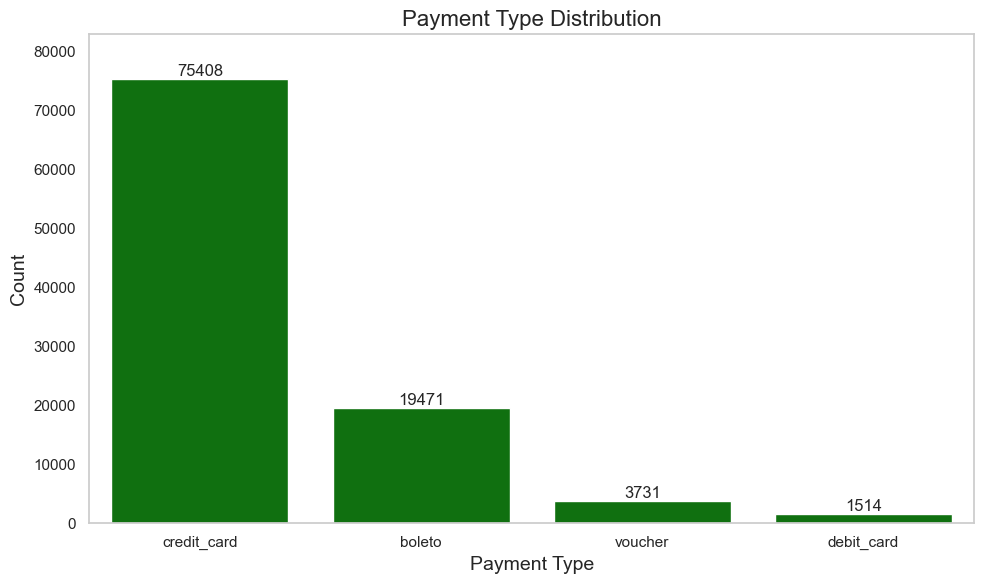

In [162]:
payment_types = overall_order_tables.groupby(['order_id', 'payment_type']).count().reset_index()['payment_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_types.index, y=payment_types.values, palette=['green'])

# Add titles and labels
plt.title('Payment Type Distribution', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set y-axis to start at zero for accurate representation
plt.ylim(0, payment_types.max() * 1.1)  # Add some space above the highest bar

# Add value labels on top of each bar
for i in range(len(payment_types)):
    plt.text(i, payment_types.values[i] + 500, payment_types.values[i], ha='center', fontsize=12)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Penjelasan** <br>
- Kartu kredit dan Boleto menjadi dua tipe pembayaran terbanyak masing-masing sebanyak 75.408 dan 19.471 transaksi
- Transaksi dengan kartu debit paling sedikit dilakukan

#### Quest: Top-10 order dengan nilai pembayaran tertinggi dan terendah
***

In [163]:
order_payments_with_most_payment_value = overall_order_tables.groupby(['order_id'])[['payment_value']].sum().reset_index().sort_values(by='payment_value', ascending=False)
order_payments_with_most_payment_value

,order_id,payment_value
1441,03caa2c082116e1d31e67e9ae3700499,109312.64
10385,1b15974a0141d54e36626dca3fdc731a,44048.00
16991,2cc9089445046817a7539d90805e6e5a,36489.24
89149,e8fa22c3673b1dd17ea315021b1f0f61,30186.00
44118,736e1922ae60d0d6a89247b851902527,29099.52
...,...,...
21650,38bcb524e1c38c2c1b60600a80fc8999,11.62
27480,47d11383b93b217d96defbb2ef1a209b,11.56
21006,37193e64eb9a46b7f3197762f242b20a,10.89
89079,e8bbc1d69fee39eee4c72cb5c969e39d,10.07


##### Top 10 order detail dengan payment tertinggi

In [164]:
df = overall_order_tables[
    overall_order_tables['order_id'].isin(order_payments_with_most_payment_value['order_id'].head(10).values)
][['order_id', 'product_id', 'payment_value']+list(customers_df.columns)]
df = pd.merge(df, products_df, on='product_id', how='inner')

In [165]:
df

,order_id,product_id,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,13664.08,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0
1,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,13664.08,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0
2,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,13664.08,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0
3,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,13664.08,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0
4,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,13664.08,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,e8fa22c3673b1dd17ea315021b1f0f61,0c9439abe84dc40a64fc164365c4d064,3018.60,1ff773612ab8934db89fd5afa8afe506,ef8d54b3797ea4db1d63f0ced6a906e9,20540,rio de janeiro,RJ,bebidas,36.0,1481.0,1.0,2775.0,16.0,38.0,11.0
99,e8fa22c3673b1dd17ea315021b1f0f61,0c9439abe84dc40a64fc164365c4d064,3018.60,1ff773612ab8934db89fd5afa8afe506,ef8d54b3797ea4db1d63f0ced6a906e9,20540,rio de janeiro,RJ,bebidas,36.0,1481.0,1.0,2775.0,16.0,38.0,11.0
100,e8fa22c3673b1dd17ea315021b1f0f61,0c9439abe84dc40a64fc164365c4d064,3018.60,1ff773612ab8934db89fd5afa8afe506,ef8d54b3797ea4db1d63f0ced6a906e9,20540,rio de janeiro,RJ,bebidas,36.0,1481.0,1.0,2775.0,16.0,38.0,11.0
101,e8fa22c3673b1dd17ea315021b1f0f61,0c9439abe84dc40a64fc164365c4d064,3018.60,1ff773612ab8934db89fd5afa8afe506,ef8d54b3797ea4db1d63f0ced6a906e9,20540,rio de janeiro,RJ,bebidas,36.0,1481.0,1.0,2775.0,16.0,38.0,11.0


##### Top 10 order detail dengan payment terendah

In [166]:
df = overall_order_tables[
    overall_order_tables['order_id'].isin(order_payments_with_most_payment_value['order_id'].tail(10).values)
][['order_id', 'product_id', 'payment_value']+list(customers_df.columns)]
df = pd.merge(df, products_df, on='product_id', how='inner')

In [167]:
df

,order_id,product_id,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,27eebc49f55d8e9b8192f11c2570d6f1,f2d80346f1dd6986e9e6611db7b708aa,11.63,55cd7bfe95dcd698acf176278e14888e,2878e5b88167faab17d4fb83a986d38b,3367,sao paulo,SP,bebes,52.0,446.0,1.0,50.0,16.0,2.0,11.0
1,37193e64eb9a46b7f3197762f242b20a,98224bfc1eaadb3a394ec334c60453ff,10.89,8e4bd65db637116b6b68109e4df21b84,b33336f46234b24a613ad9064d13106d,4046,sao paulo,SP,automotivo,43.0,433.0,3.0,50.0,16.0,10.0,12.0
2,38bcb524e1c38c2c1b60600a80fc8999,680cc8535be7cc69544238c1d6a83fe8,11.62,d2c63ad286e3ca9dd69218008d61ff81,728e4a7d0db4845270091ded0923c71f,80540,curitiba,PR,pet_shop,48.0,1392.0,1.0,200.0,16.0,2.0,11.0
3,44a2fb6a4520b17de57affbab761dfcc,da86f3242cb55a55dd9cd7b19d951685,12.28,04ba9496f04b0eaa070def5b5ab662ac,809ca96e9696b9be5f69cd7ae803049d,7500,santa isabel,SP,beleza_saude,38.0,311.0,1.0,200.0,16.0,3.0,12.0
4,47d11383b93b217d96defbb2ef1a209b,0eeeb45e2f5911fd44282e5bb0c624ff,2.64,046f890135acc703faff4c1fc0c2d73c,70601471b692cc0879300373118041ff,37640,extrema,MG,musica,58.0,143.0,1.0,82.0,12.0,15.0,15.0
5,47d11383b93b217d96defbb2ef1a209b,0eeeb45e2f5911fd44282e5bb0c624ff,8.92,046f890135acc703faff4c1fc0c2d73c,70601471b692cc0879300373118041ff,37640,extrema,MG,musica,58.0,143.0,1.0,82.0,12.0,15.0,15.0
6,8bf12a5b441bd86a1edbccb6137c9b0b,f2d80346f1dd6986e9e6611db7b708aa,11.63,c466c7e0ab222e3ef6c8046e96128a8d,6f5b9d1cdccc4d28f0483a612edecacf,2306,sao paulo,SP,bebes,52.0,446.0,1.0,50.0,16.0,2.0,11.0
7,97369eeb115806c27ee2054105eabe97,2083a6feb4bbb31f6abc92fc24e468c0,12.39,35647e39316747b2bb470dc93ddb67aa,7859a40482024a3d00041c4ca1434298,5368,sao paulo,SP,telefonia,56.0,3135.0,2.0,150.0,19.0,15.0,15.0
8,c79bdf061e22288609201ec60deb42fb,5304ff3fa35856a156e1170a6022d34d,12.22,fe4176df564772c058286208c0daa2a8,a78c7a68877d33bacf81b01bc4a4d2f2,5047,sao paulo,SP,artes,27.0,59.0,2.0,100.0,20.0,20.0,11.0
9,e8bbc1d69fee39eee4c72cb5c969e39d,310dc32058903b6416c71faff132df9e,10.07,184e8e8e48937145eb96c721ef1f0747,bd06ce0e06ad77a7f681f1a4960a3cc6,4814,sao paulo,SP,papelaria,36.0,326.0,1.0,300.0,16.0,10.0,11.0


#### Quest: Bagaimana distribusi skor review dari seluruh order?

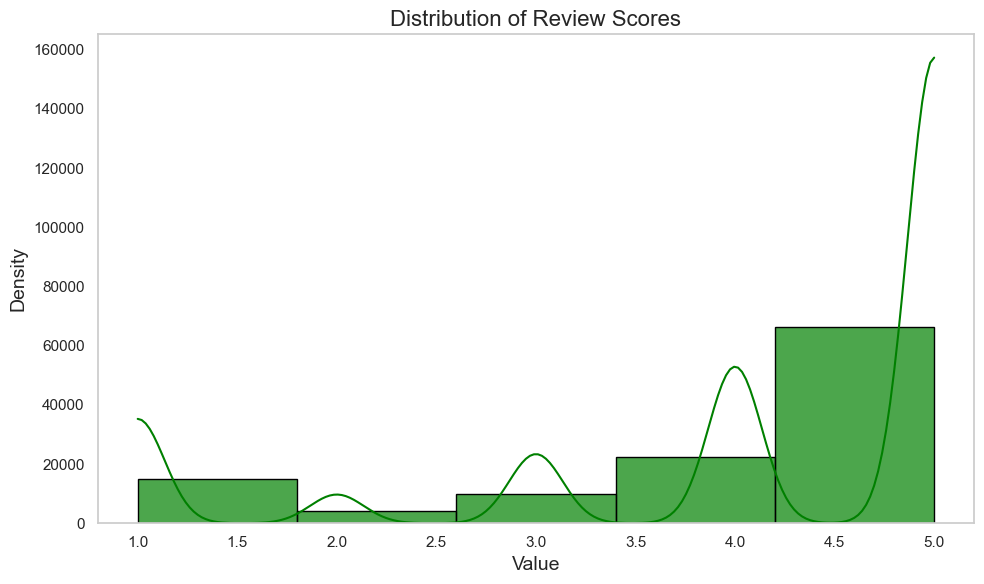

In [168]:
# Create a histogram with KDE for the numerical column
plt.figure(figsize=(10, 6))
sns.histplot(overall_order_tables['review_score'], kde=True, bins=5,
             color='green', edgecolor='black', alpha=0.7)

# Set title and labels
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Set y-axis to start at zero for accurate representation
plt.ylim(0)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Insights** <br>
- Skor review memiliki distribusi left-skewed
- Sebagian besar customer memberikan skor review dalam rentang 4 sampai 5
- Beberapa customer (tidak cenderung banyak) memberikan skor review dalam rentang 1 sampai 2

### EDA on Products

#### Quest: Bagaimana distribusi dari setiap category product?
- Tampilkan top-20 category product yang paling banyak dan sedikit

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\3214012515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_distribution.values, y=product_category_distribution.index, palette=['green'])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\3214012515.py:4: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=product_category_distribution.values, y=product_category_distribution.index, palette=['green'])


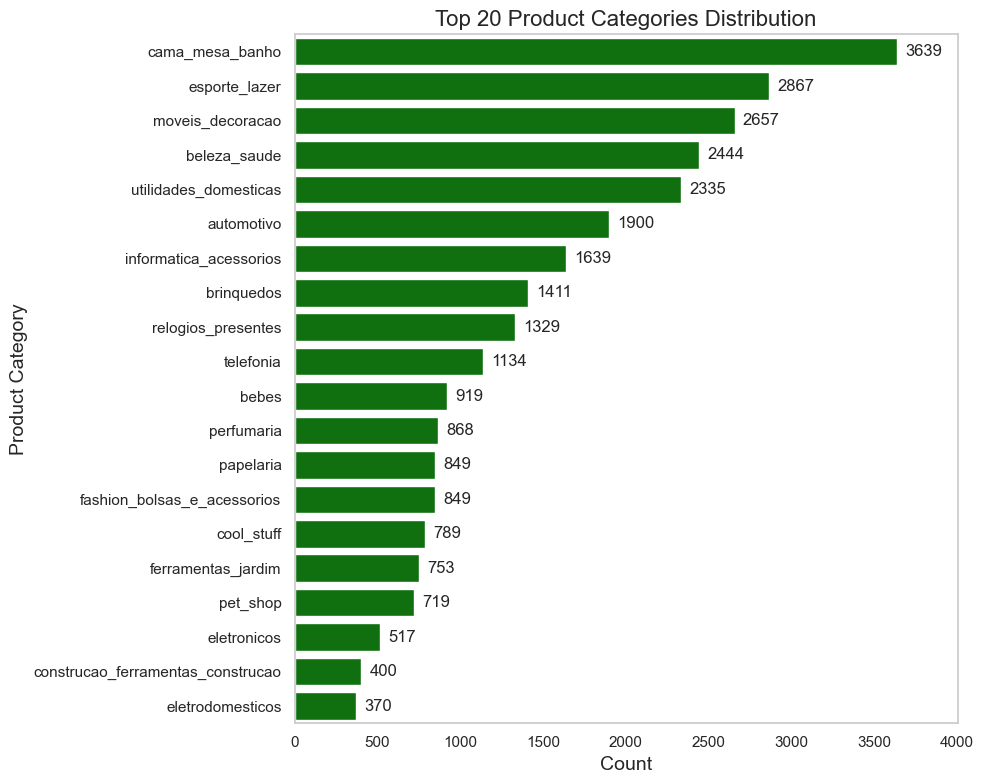

In [169]:
product_category_distribution = products_df['product_category_name'].value_counts().head(20)
# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=product_category_distribution.values, y=product_category_distribution.index, palette=['green'])

# Add titles and labels
plt.title('Top 20 Product Categories Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Set x-axis to start at zero for accurate representation
plt.xlim(0, product_category_distribution.max() * 1.1)  # Add some space to the right of the highest bar

# Add value labels on the right side of each bar
for i in range(len(product_category_distribution)):
    plt.text(product_category_distribution.values[i] + 50, i, product_category_distribution.values[i],
             va='center', fontsize=12)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Insights** <br>
- Dari tabel products, melalui gambar di atas dapat diketahui kategori produk terbanyak yang ditempati oleh **cama_mesa_banho** dengan 3.639 produk

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\3139188687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_20_categories.values, y=last_20_categories.index, palette=['green'])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\3139188687.py:6: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=last_20_categories.values, y=last_20_categories.index, palette=['green'])


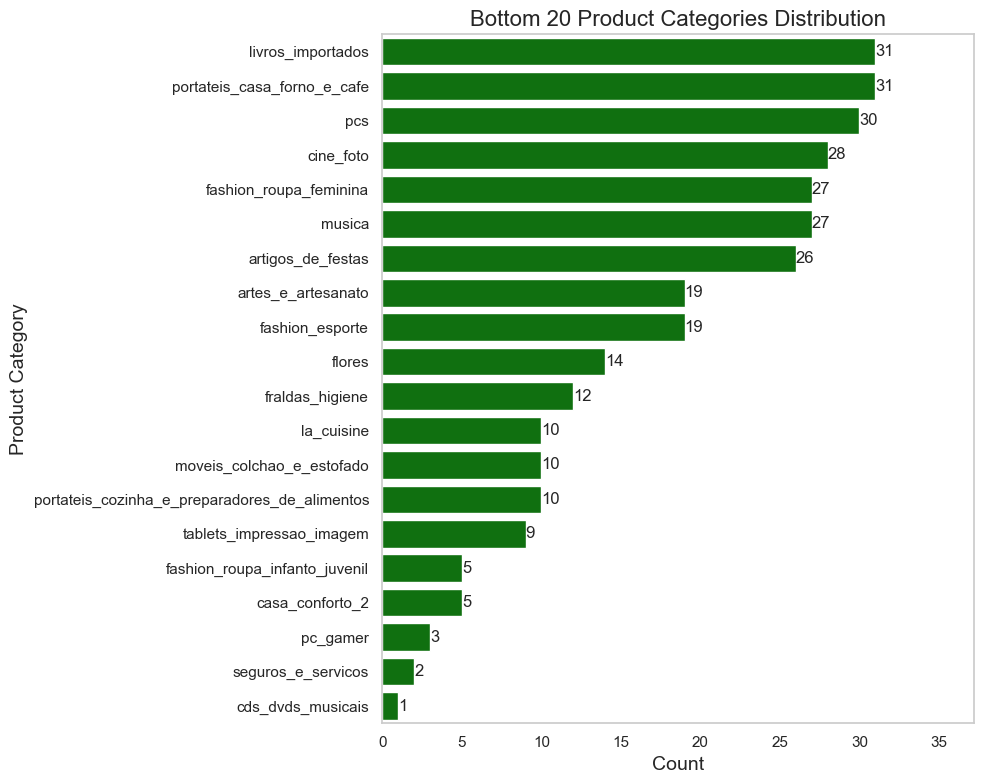

In [170]:
# Select the last 20 entries
last_20_categories = products_df['product_category_name'].value_counts().tail(20)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=last_20_categories.values, y=last_20_categories.index, palette=['green'])

# Add titles and labels
plt.title('Bottom 20 Product Categories Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Set x-axis to start at zero for accurate representation
plt.xlim(0, last_20_categories.max() * 1.2)  # Add some space to the right of the highest bar

# Add value labels on the right side of each bar
for i in range(len(last_20_categories)):
    plt.text(last_20_categories.values[i], i, last_20_categories.values[i],
             va='center', fontsize=12)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Insights** <br>
- Dari tabel products, melalui gambar di atas dapat diketahui kategori produk paling sedikit yang ditempati oleh **cds_dvds_musicais** dengan 1 produk

#### Quest: Bagaimana distribusi volume (length x width x height) dari setiap category product?

In [171]:
# buat atribut baru bernama volume yang merupakan hasil perkalian dari panjang, lebar, dan tinggi product
products_df['volume'] = products_df['product_length_cm'] * products_df['product_width_cm'] * products_df['product_height_cm']

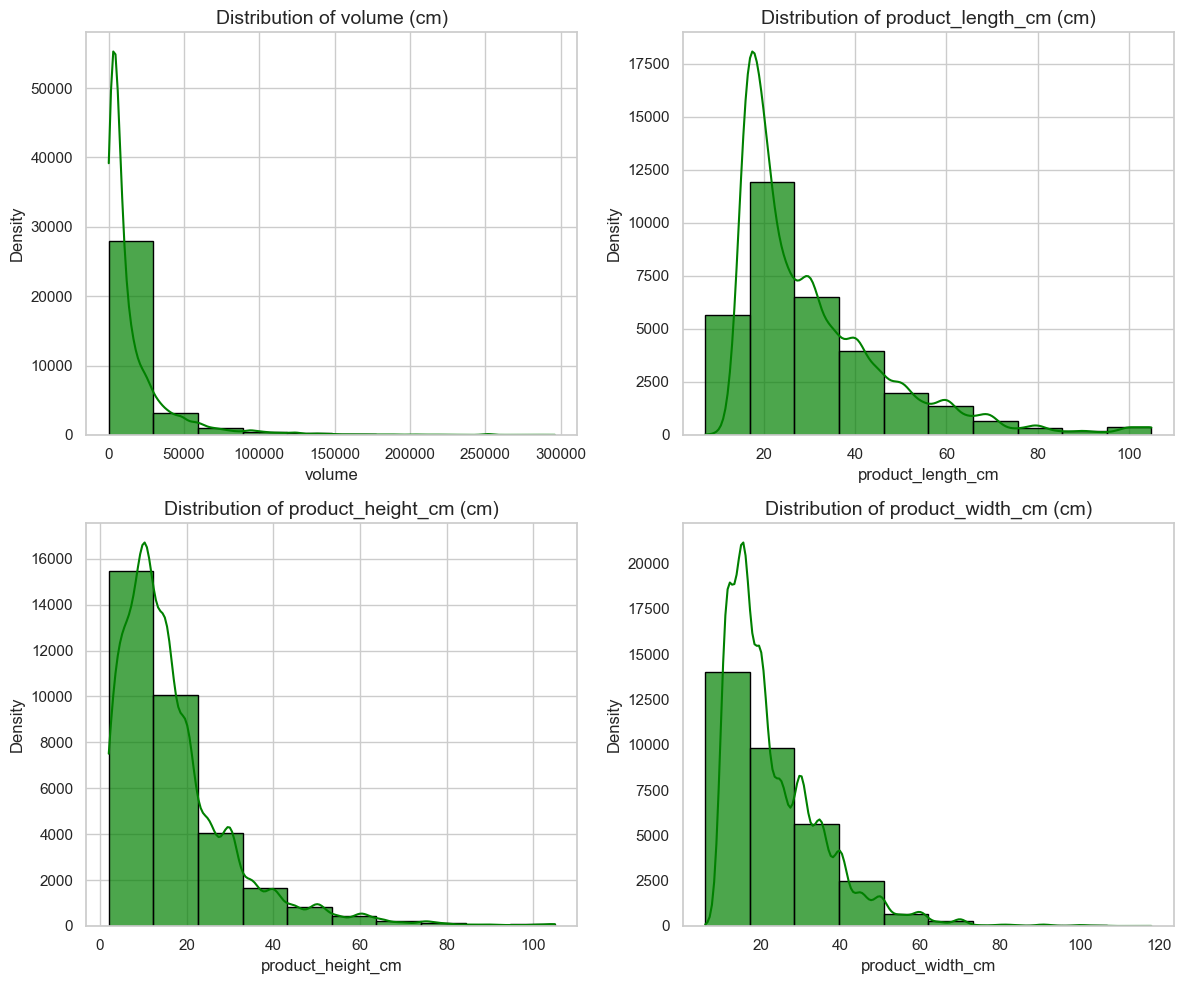

In [172]:
# buat distribution dari numerical columns
numerical_columns = [
    'volume', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms with KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(products_df[col], kde=True, ax=axes[i], bins=10,
                 color='green', edgecolor='black', alpha=0.7)

    # Set titles and labels
    axes[i].set_title(f'Distribution of {col} (cm)', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

    # Set y-axis to start at zero for accurate representation
    axes[i].set_ylim(0)

# Improve layout and remove gridlines for clarity
plt.tight_layout()
plt.grid(False)

# Show the plot
plt.show()

**Insights** <br>
- Distribusi volume, panjang, lebar, dan tinggi suatu produk semuanya right-skewed atau tidak normal
- Distribusi volume produk paling banyak berada diantara rentang 0 - 5000 cm3
- Distribusi panjang produk paling banyak berada dalam rentang 20 - 30 cm
- Distribusi tinggi produk paling banyak berada dalam rentang 5 - 20 cm
- Distribusi lebar produk paling banyak berada dalam rentang 5 - 20 cm

#### Quest: Bagaimana distribusi dari berat product?

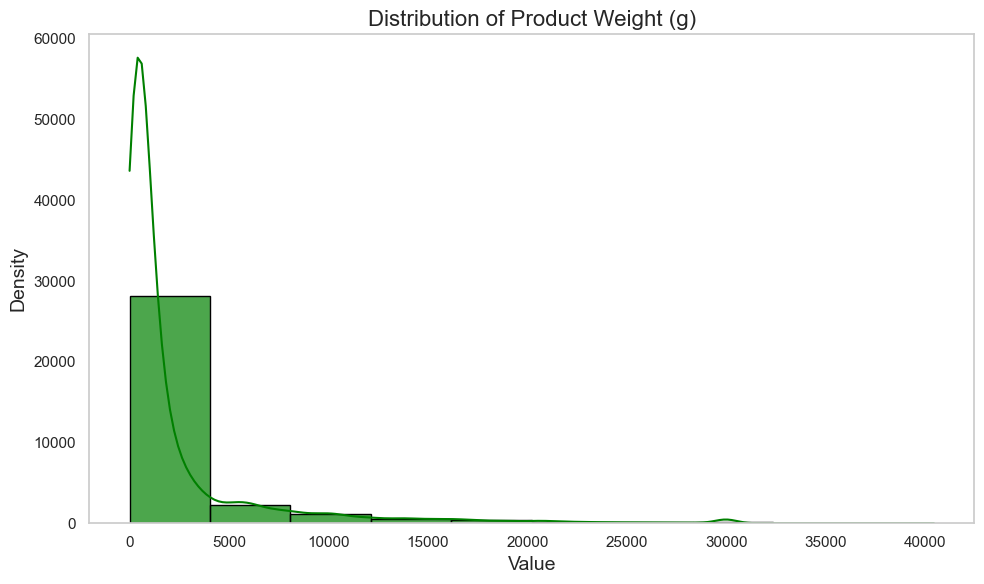

In [173]:
# Create a histogram with KDE for the numerical column
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_weight_g'], kde=True, bins=10,
             color='green', edgecolor='black', alpha=0.7)

# Set title and labels
plt.title('Distribution of Product Weight (g)', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Set y-axis to start at zero for accurate representation
plt.ylim(0)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Insights** <br>
- Sama seperti distribusi dimensi produk, dimensi berat produk juga memiliki distribusi right-skewed (tidak normal). Artinya beberapa produk memiliki berat lebih dari 15000 (g)
- Mayoritas berat produk berada diantara rentang 0 - 5000 (g)

#### Quest: Top-5 category product dengan nama product terpanjang

In [174]:
products_df.sort_values(by='product_name_lenght', ascending=False).head(5)[['product_category_name', 'product_name_lenght']]

,product_category_name,product_name_lenght
22129,perfumaria,76.0
16965,moveis_decoracao,72.0
2250,beleza_saude,69.0
10620,cama_mesa_banho,68.0
20748,construcao_ferramentas_jardim,67.0


**Insights** <br>
1. Kategori produk *perfumaria*, *moveis_decoracao*, *beleza_saude*, *cama_mesa_banho*, dan *construcao_ferramentas_jardim* memiliki nama produk yang terpanjang

### EDA on Sellers

#### Quest: Penjual paling banyak berasal dari city dan state mana?

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\486960136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette=['green'])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\486960136.py:6: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=city_counts.index, x=city_counts.values, palette=['green'])


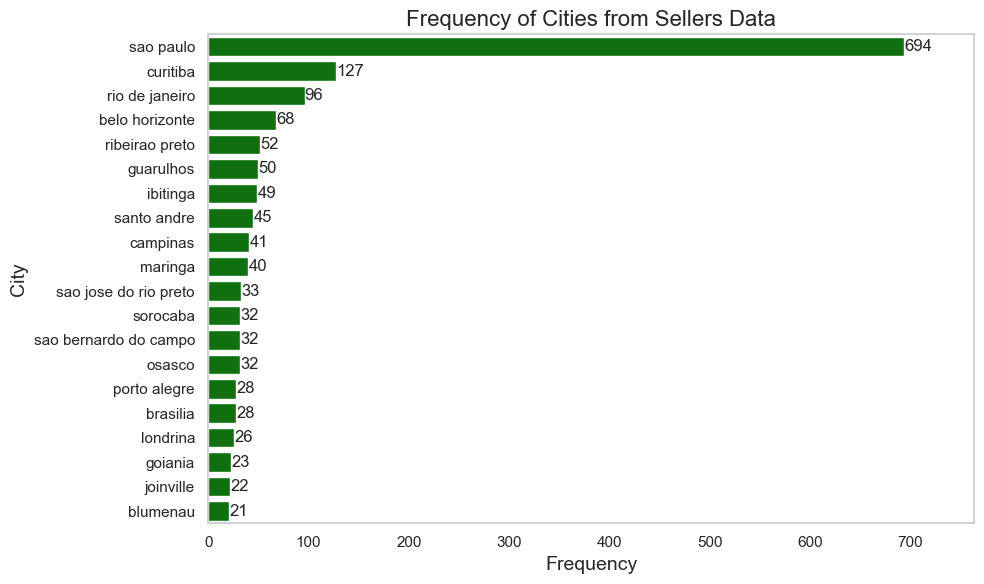

In [175]:
# Count the frequency of each city
city_counts = sellers_df['seller_city'].value_counts().head(20)

# Create a horizontal bar plot for city frequencies
plt.figure(figsize=(10, 6))
sns.barplot(y=city_counts.index, x=city_counts.values, palette=['green'])

# Add titles and labels
plt.title('Frequency of Cities from Sellers Data', fontsize=16)
plt.ylabel('City', fontsize=14)
plt.xlabel('Frequency', fontsize=14)

# Set x-axis to start at zero for accurate representation
plt.xlim(0, city_counts.max() * 1.1)  # Add some space to the right of the highest bar

# Add value labels on the right side of each bar
for i in range(len(city_counts)):
    plt.text(city_counts.values[i] + 0.1, i, city_counts.values[i],
             va='center', fontsize=12)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\2621226946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette=['green'])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\2621226946.py:6: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=state_counts.index, x=state_counts.values, palette=['green'])


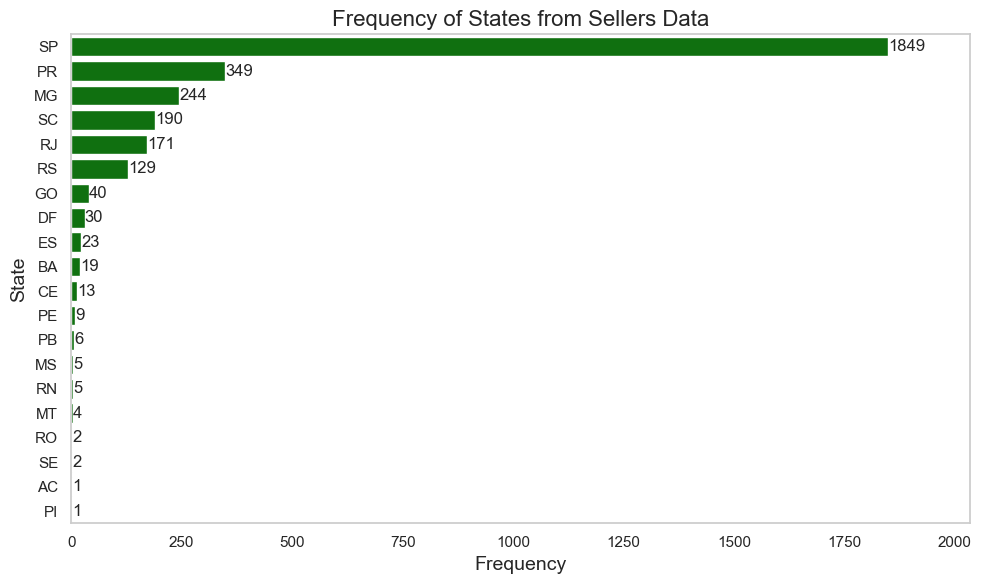

In [176]:
# Count the frequency of each state
state_counts = sellers_df['seller_state'].value_counts().head(20)

# Create a horizontal bar plot for city frequencies
plt.figure(figsize=(10, 6))
sns.barplot(y=state_counts.index, x=state_counts.values, palette=['green'])

# Add titles and labels
plt.title('Frequency of States from Sellers Data', fontsize=16)
plt.ylabel('State', fontsize=14)
plt.xlabel('Frequency', fontsize=14)

# Set x-axis to start at zero for accurate representation
plt.xlim(0, state_counts.max() * 1.1)  # Add some space to the right of the highest bar

# Add value labels on the right side of each bar
for i in range(len(state_counts)):
    plt.text(state_counts.values[i] + 0.1, i, state_counts.values[i],
             va='center', fontsize=12)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Penjelasan** <br>
- Terlihat bahwa penjual paling banyak berasal dari **Sao Paulo** dan negara bagian **SP**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah hasil penjualan dari setiap product category?

In [177]:
product_orders = pd.merge(overall_order_tables, products_df, on='product_id', how='inner')

# simpan data products orders untuk digunakan di dashboard
product_orders.to_csv('./dashboard/product_orders.csv', index=False)

In [178]:
# karena kategori produk cukup banyak >30.000 kategori produk, maka ambil beberapa saja dan ganti kategori yang tidak termasuk kategori menjadi 'Others'
df = product_orders['product_category_name'].value_counts()

# filter kategori produk dengan nilai >2000 untuk ditampilkan selain itu beri simbol "Others"
filtered_categories = df[df >= 2000].index
product_orders['updated_product_category'] = product_orders['product_category_name'].where(product_orders['product_category_name'].isin(filtered_categories), 'Other')

C:\Users\user1\AppData\Local\Temp\ipykernel_7780\698887782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='updated_product_category', x='price', data=df, palette=['green'])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\698887782.py:6: UserWarning: 
The palette list has fewer values (1) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='updated_product_category', x='price', data=df, palette=['green'])


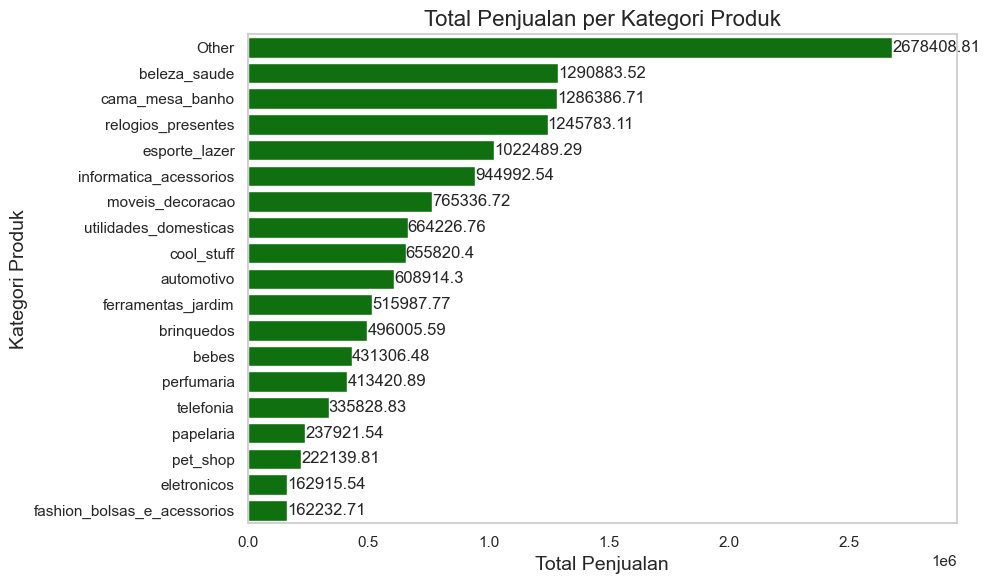

In [179]:
# hitung total penjualan per produk kategori
df = product_orders.groupby('updated_product_category')['price'].sum().reset_index().sort_values(by='price', ascending=False)

# Create a horizontal bar plot for city frequencies
plt.figure(figsize=(10, 6))
sns.barplot(y='updated_product_category', x='price', data=df, palette=['green'])

# Add titles and labels
plt.title('Total Penjualan per Kategori Produk', fontsize=16)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xlabel('Total Penjualan', fontsize=14)

# Set x-axis to start at zero for accurate representation
plt.xlim(0, df['price'].max() * 1.1)  # Add some space to the right of the highest bar

# Add value labels on the right side of each bar
for i in range(len(df)):
    plt.text(df['price'].values[i] + 0.1, i, df['price'].values[i],
             va='center', fontsize=12)

# Improve layout and remove gridlines for clarity
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

**Insights** <br>
- Karena kategori produk yang ditampilkan di atas merupakan hasil filter, maka kategori produk yang memiliki orders >=2000 pesanan dikategorikan menjadi **Others**
- Top-3 kategori produk selain **Others** dengan total penjualan tertinggi (price) yaitu *beleza_saude*, *cama_mesa_banho*, dan *relogios_presentes* masing-masing sebesar 1.290.883 dollar (asumsi dollar sebagai mata uang), 1.286.386 dollar, dan 1.245.783 dollar
- Produk fashion dan aksesoris (*fashion_bolsas_e_accessorios*) paling sedikit mendatangkan penjualan

### Pertanyaan 2: Bagaimana hasil tren dari penjualan (order) setiap tahun?

#### Tren penjualan per tahun

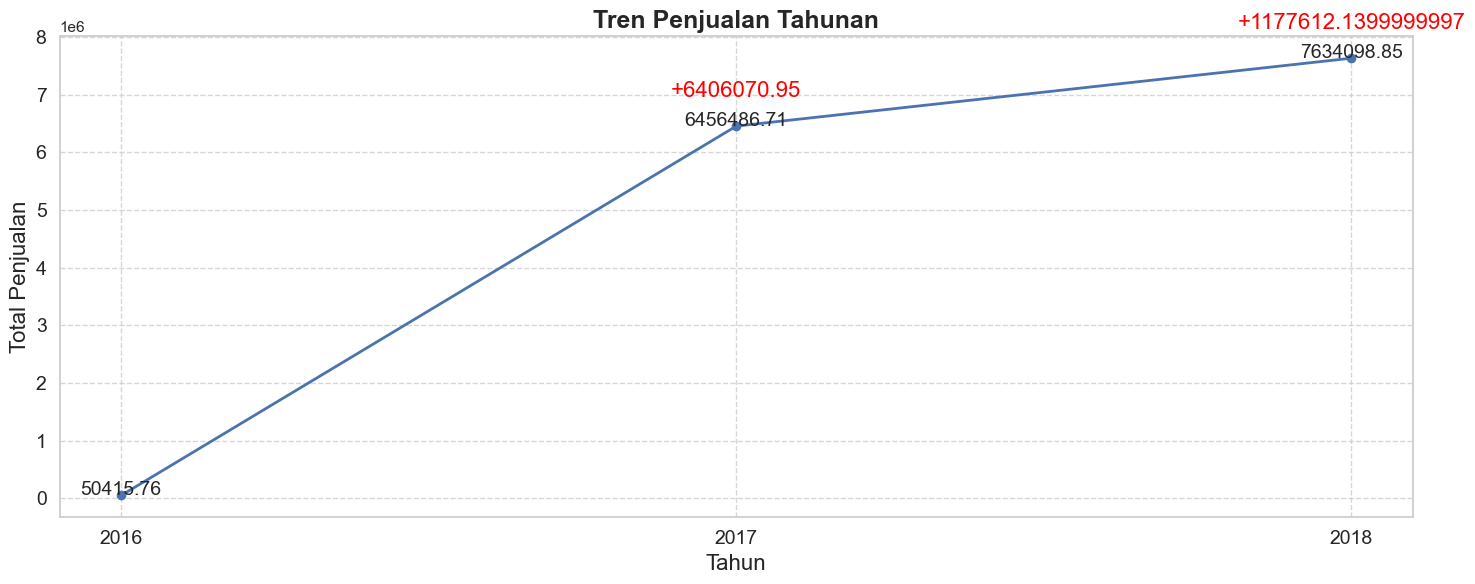

In [180]:
# cari tahu data (price) penjualan per Tahun
data_penjualan_tahunan = overall_order_tables.groupby(
    overall_order_tables['order_purchase_timestamp'].dt.to_period('Y')
).agg({'price': 'sum'}).reset_index()
data_penjualan_tahunan['order_purchase_timestamp'] = data_penjualan_tahunan['order_purchase_timestamp'].apply(lambda x: str(x))
data_penjualan_tahunan['Change'] = data_penjualan_tahunan['price'].diff().fillna(0)

# set ukuran kanvas
plt.figure(figsize=(15, 6))

# Plot the data with custom colors
plt.plot(
    data_penjualan_tahunan['order_purchase_timestamp'],
    data_penjualan_tahunan['price'],
    marker='o',
    linestyle='-',
    color='b', linewidth=2)

# Annotate each point with the price value and change
for i in range(len(data_penjualan_tahunan)):
    plt.text(
        data_penjualan_tahunan['order_purchase_timestamp'][i],
        data_penjualan_tahunan['price'][i] + 1000,
        f'{data_penjualan_tahunan["price"][i]}',
             ha='center', fontsize=14)
    if i > 0:  # Skip the first year for change annotation
        change = data_penjualan_tahunan['Change'][i]
        change_text = f'{"+" if change > 0 else ""}{float(change)}'
        plt.text(
            data_penjualan_tahunan['order_purchase_timestamp'][i],
            data_penjualan_tahunan['price'][i] + 500000,
            change_text,
            ha='center', fontsize=16, color='red')

# Adding titles and labels
plt.title('Tren Penjualan Tahunan', fontsize=18, fontweight='bold')
plt.xlabel('Tahun', fontsize=16)
plt.ylabel('Total Penjualan', fontsize=16)

# Customize the ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.8)

# Show the plot
plt.tight_layout()
plt.show()

**Insights** <br>
- Secara keseluruhan per tahun tren penjualan yang dihasilkan mampu memberikan profit dari tahun-tahun sebelumnya, dimana peningkatan profit tertinggi terjadi dari 2016 ke 2017 dengan penambahan sebesar 6.406.070 dollar
- Peningkatan profit dari 2017 ke 2018 tidak setinggi tahun sebelumnya karena tren penjualan pada bulan 08-2018 ke 09-2018 mengalami penurunan omzet penjualan cukup tinggi yang menyebabkan total penjualan keseluruhan tidak termarkup

## Analisis Lanjutan (Opsional)

### RFM Analysis
***
**Pengertian** <br>
RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

**Pertanyaan untuk RFM Analysis**
1. **Recency**: Kapan terakhir pelanggan melakukan transaksi?
2. **Frequency**: Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
3. **Monetary**: Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [181]:
def create_rfm_df(unique_primary_key, name='customer'):
    # buat variabel untuk menampung hasil perhitungan RFM analysis
    rfm_df = overall_order_tables.groupby(unique_primary_key, as_index=False).agg({
        "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
        "order_id": "nunique", # menghitung jumlah order unik
        "price": "sum" # menghitung jumlah revenue yang dihasilkan
    })
    rfm_df.columns = [name+"_id", "max_order_timestamp", "frequency", "monetary"]

    # menghitung kapan terakhir pelanggan melakukan transaksi (hari)
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = overall_order_tables["order_purchase_timestamp"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

    # buat mapping customer_id agar ID (ambil 3 kode string terakhir dari setiap id)
    rfm_df[name+'_id_mapping'] = rfm_df[name+'_id'].apply(lambda x: "ID-"+x[-3:])

    return rfm_df

In [182]:
def visualize_rfm_df(
    rfm_df,
    name='customer',
    name_id='customer_id_mapping',
    n_objects=10,
    recency_ascending=True,
    frequency_ascending=False,
    monetary_ascending=False,
):

    # identifikasi best customer berdasarkan parameter frequency, monetary, recency
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    sns.barplot(y="recency", x=name_id, data=rfm_df.sort_values(by="recency", ascending=recency_ascending).head(n_objects), palette=['green'], ax=ax[0])
    ax[0].set_ylabel(None)
    ax[0].set_xlabel(None)
    ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
    ax[0].tick_params(axis ='x', labelsize=15,rotation=45)

    sns.barplot(y="frequency", x=name_id, data=rfm_df.sort_values(by="frequency", ascending=frequency_ascending).head(n_objects), palette=['green'], ax=ax[1])
    ax[1].set_ylabel(None)
    ax[1].set_xlabel(None)
    ax[1].set_title("By Frequency", loc="center", fontsize=18)
    ax[1].tick_params(axis='x', labelsize=15, rotation=45)

    sns.barplot(y="monetary", x=name_id, data=rfm_df.sort_values(by="monetary", ascending=monetary_ascending).head(n_objects), palette=['green'], ax=ax[2])
    ax[2].set_ylabel(None)
    ax[2].set_xlabel(None)
    ax[2].set_title("By Monetary", loc="center", fontsize=18)
    ax[2].tick_params(axis='x', labelsize=15,rotation=45)

    plt.suptitle(f"Best {name.capitalize()} Based on RFM Parameters ({name_id})", fontsize=20)
    plt.show()

#### Customer RFM Analysis

In [183]:
customer_rfm_df = create_rfm_df('customer_unique_id')
customer_rfm_df

,customer_id,frequency,monetary,recency,customer_id_mapping
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116,ID-1e2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119,ID-e3f
2,0000f46a3911fa3c0805444483337064,1,69.00,542,ID-064
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326,ID-078
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293,ID-255
...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1,1570.00,452,ID-684
94716,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,267,ID-061
94717,ffff371b4d645b6ecea244b27531430a,1,89.90,573,ID-30a
94718,ffff5962728ec6157033ef9805bacc48,1,115.00,124,ID-c48


C:\Users\user1\AppData\Local\Temp\ipykernel_7780\433532120.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x=name_id, data=rfm_df.sort_values(by="recency", ascending=recency_ascending).head(n_objects), palette=['green'], ax=ax[0])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\433532120.py:14: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="recency", x=name_id, data=rfm_df.sort_values(by="recency", ascending=recency_ascending).head(n_objects), palette=['green'], ax=ax[0])
C:\Users\user1\AppData\Local\Temp\ipykernel_7780\433532120.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

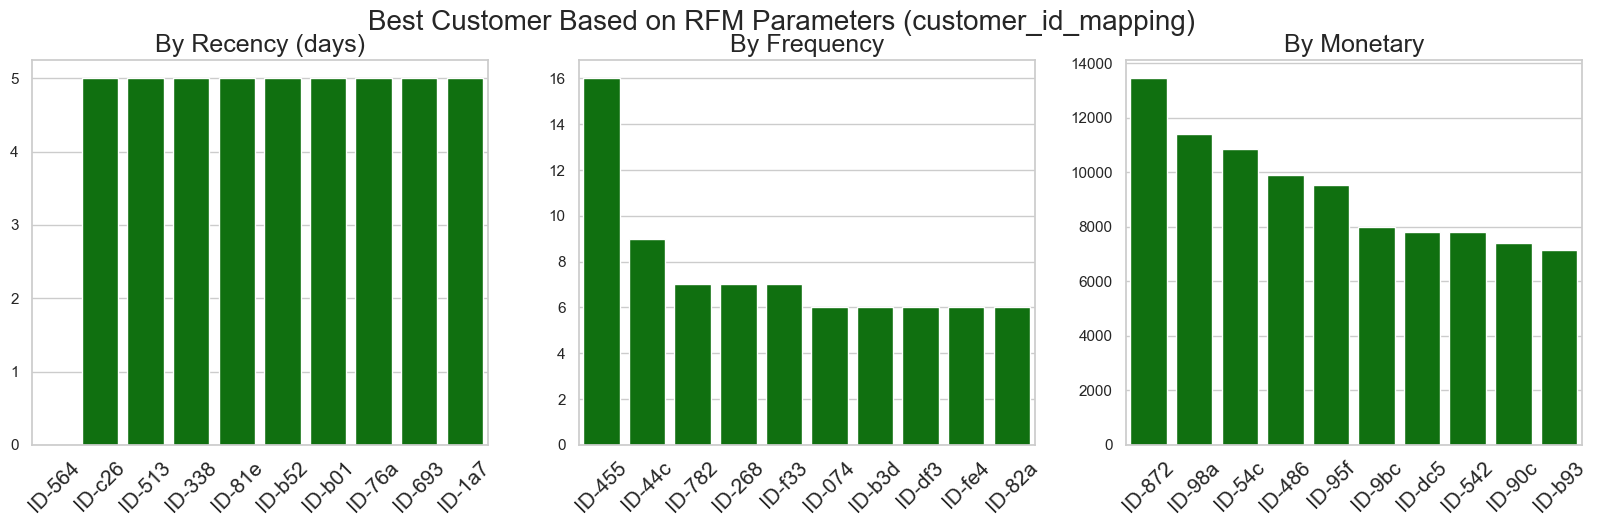

In [184]:
visualize_rfm_df(customer_rfm_df)

**Insights** <br>
1. **Recency**
    - Customer dengan ID-564 menjadi customer yang baru melakukan transaksi akhir-akhir ini dan sisanya baru melakukan transaksi 5 hari ke belakang
2. **Frequency**
    - Customer dengan ID-455 menjadi customer yang paling sering melakukan transkasi akhir-akhir ini dan sisanya melakukan transaksi dalam rentang 6 - 9 transaksi akhir-akhir ini
3. **Monetary**
    - Customer dengan ID-872 menyumbang total pembelian terbanyak +-13.970 dollar

### Geospatial Analysis
***
**Pengertian** <br>
Geospasial analisis bertujuan untuk menganalisis data berdasarkan lokasi geografis untuk mengidentifikasi tren atau pola tertentu di suatu wilayah. Package seperti *Folium* dapat digunakan untuk mendapatkan distribusi data berdasarkan lokasi

**Tujuan** <br>
- Tampilkan demografi top-100 user berdasarkan hasil RFM analysis (monetary tertinggi)

In [185]:
top_n_users = 100

#### Demografi Geolocation dari Top-10 user based on RFM Analysis

In [186]:
# gabungkan data rfm analysis, customer, dan geolocation
merge_customer_geo_rfm_df = pd.merge(customer_rfm_df, customers_df, left_on='customer_id', right_on='customer_unique_id', how='inner')
merge_customer_geo_rfm_df = pd.merge(merge_customer_geo_rfm_df, geolocation_df,
                                     left_on='customer_zip_code_prefix',
                                     right_on='geolocation_zip_code_prefix',
                                     how='inner')

In [187]:
# pertahankan hanya kolom-kolom yang penting saja untuk geospatial analysis
merge_customer_geo_rfm_df = merge_customer_geo_rfm_df[
    ['customer_id_mapping','frequency', 'monetary','recency','geolocation_lat',
     'geolocation_lng', 'geolocation_zip_code_prefix',
     'geolocation_city', 'geolocation_state'
    ]
].sort_values(by='monetary', ascending=False).head(top_n_users)

In [188]:
merge_customer_geo_rfm_df

,customer_id_mapping,frequency,monetary,recency,geolocation_lat,geolocation_lng,geolocation_zip_code_prefix,geolocation_city,geolocation_state
404256,ID-872,1,13440.00,339,-22.902819,-43.186942,20080,rio de janeiro,RJ
404280,ID-872,1,13440.00,339,-22.902807,-43.187012,20080,rio de janeiro,RJ
404281,ID-872,1,13440.00,339,-22.899882,-43.184668,20080,rio de janeiro,RJ
404249,ID-872,1,13440.00,339,-22.899698,-43.185685,20080,rio de janeiro,RJ
404248,ID-872,1,13440.00,339,-22.899683,-43.185815,20080,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...
5523240,ID-98a,1,11383.95,501,-15.626294,-56.080516,78065,cuiaba,MT
5523241,ID-98a,1,11383.95,501,-15.623543,-56.082551,78065,cuiaba,MT
5523242,ID-98a,1,11383.95,501,-15.612527,-56.079248,78065,cuiaba,MT
5523246,ID-98a,1,11383.95,501,-15.620201,-56.083844,78065,cuiaba,MT


In [189]:
# tampilkan demografi customer dengan folium
# Create a base map centered around the average location
map_center = [merge_customer_geo_rfm_df['geolocation_lat'].mean(), merge_customer_geo_rfm_df['geolocation_lng'].mean()]
customer_map = folium.Map(location=map_center, zoom_start=2)

# Add markers for each customer
for index, row in merge_customer_geo_rfm_df.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f'Customer: {row["customer_id_mapping"]}',
        icon=folium.Icon(color='blue')
    ).add_to(customer_map)

# Display the map (in Jupyter Notebook or similar environments)
customer_map

### Clustering

#### Grouping
***
Pengelompokkan data menggunakan **.groupby()** sudah dilakukan pada langkah-langkah analisis sebelumnya

#### Binning
***
**Pengertian** <br>
Fungsi pandas.cut digunakan untuk melakukan segmentasi dan mengurutkan nilai data ke dalam kelompok atau interval yang terpisah. Fungsi ini sangat berguna ketika Anda ingin mengubah variabel kontinu menjadi variabel kategoris. Misalnya, Anda mungkin ingin mengkategorikan usia ke dalam kelompok seperti "anak-anak", "remaja", dan "dewasa".

**Tujuan**
Teknik ini umumnya digunakan untuk diskritisasi data kontinyu menjadi ke dalam interval atau kategori tertentu. Hal ini dapat dimanfaatkan untuk tujuan pembelajaran mesin berbasis data kategori seperti Naive Bayes dan Decision Tree

##### Binning RFM Analysis [frequency, monetary, recency] from Customer

In [190]:
customer_rfm_df['frequency_bin'] = pd.cut(customer_rfm_df['frequency'], bins=3, labels=['infrequent', 'middle', 'frequent'])
customer_rfm_df['monetary_bin'] = pd.cut(customer_rfm_df['monetary'], bins=3, labels=['low expense', 'middle', 'high expense'])
customer_rfm_df['recency_bin'] = pd.cut(customer_rfm_df['recency'], bins=3, labels=['long time', 'middle', 'recently'])
customer_rfm_df

,customer_id,frequency,monetary,recency,customer_id_mapping,frequency_bin,monetary_bin,recency_bin
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116,ID-1e2,infrequent,low expense,long time
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119,ID-e3f,infrequent,low expense,long time
2,0000f46a3911fa3c0805444483337064,1,69.00,542,ID-064,infrequent,low expense,recently
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326,ID-078,infrequent,low expense,middle
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293,ID-255,infrequent,low expense,middle
...,...,...,...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1,1570.00,452,ID-684,infrequent,low expense,middle
94716,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,267,ID-061,infrequent,low expense,middle
94717,ffff371b4d645b6ecea244b27531430a,1,89.90,573,ID-30a,infrequent,low expense,recently
94718,ffff5962728ec6157033ef9805bacc48,1,115.00,124,ID-c48,infrequent,low expense,long time


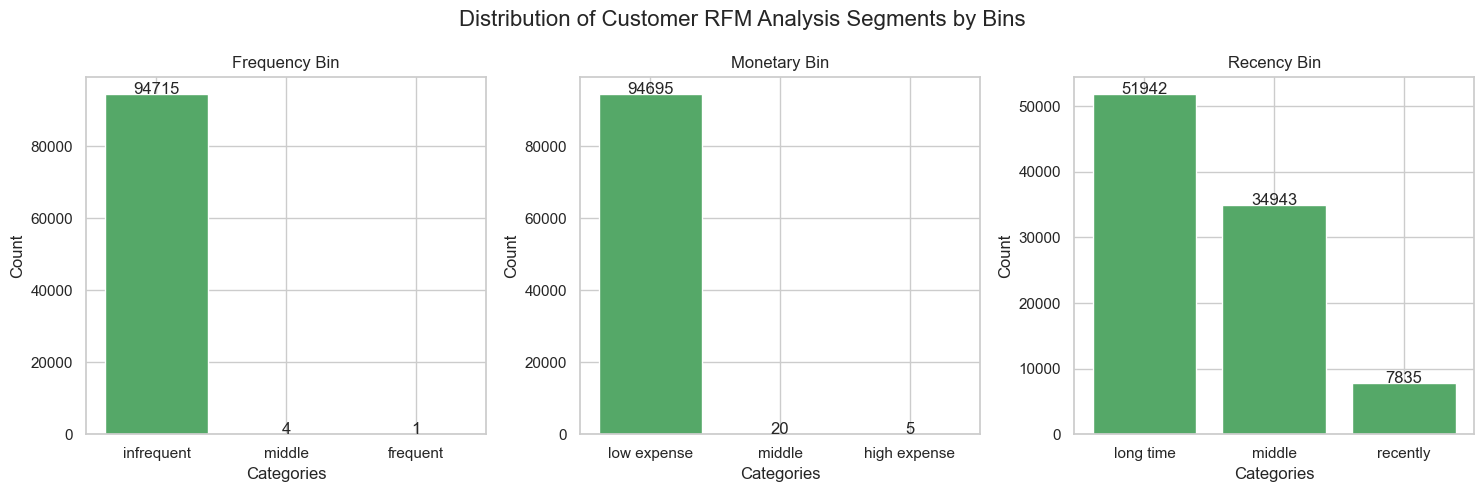

In [191]:
# Count frequencies for each categorical column
frequency_counts = customer_rfm_df['frequency_bin'].value_counts()
monetary_counts = customer_rfm_df['monetary_bin'].value_counts()
recency_counts = customer_rfm_df['recency_bin'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Distribution of Customer RFM Analysis Segments by Bins', fontsize=16)

# Frequency Bin Plot
axes[0].bar(frequency_counts.index, frequency_counts.values, color='g')
axes[0].set_title('Frequency Bin')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Count')
# Add annotations on top of bars for Frequency Bin
for index, value in enumerate(frequency_counts.values):
    axes[0].text(index, value + 0.1, str(value), ha='center')

# Monetary Bin Plot
axes[1].bar(monetary_counts.index, monetary_counts.values, color='g')
axes[1].set_title('Monetary Bin')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Count')
# Add annotations on top of bars for Monetary Bin
for index, value in enumerate(monetary_counts.values):
    axes[1].text(index, value + 0.1, str(value), ha='center')

# Recency Bin Plot
axes[2].bar(recency_counts.index, recency_counts.values, color='g')
axes[2].set_title('Recency Bin')
axes[2].set_xlabel('Categories')
axes[2].set_ylabel('Count')
# Add annotations on top of bars for Recency Bin
for index, value in enumerate(recency_counts.values):
    axes[2].text(index, value + 0.1, str(value), ha='center')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

## Conclusion

1. Pertanyaan : Bagaimana jumlah hasil penjualan dari setiap product category?
**Jawaban**: <br>
- Karena kategori produk yang ditampilkan di atas merupakan hasil filter, maka kategori produk yang memiliki orders >=2000 pesanan dikategorikan menjadi Others
- Top-3 kategori produk selain Others dengan total penjualan tertinggi (price) yaitu beleza_saude, cama_mesa_banho, dan relogios_presentes masing-masing sebesar 1.290.883 dollar (asumsi dollar sebagai mata uang), 1.286.386 dollar, dan 1.245.783 dollar
- Produk fashion dan aksesoris (fashion_bolsas_e_accessorios) paling sedikit mendatangkan penjualan

2. Pertanyaan : Bagaimana hasil tren dari penjualan (order) setiap tahun?
**Jawaban**: <br>
- Secara keseluruhan per tahun tren penjualan yang dihasilkan mampu memberikan profit dari tahun-tahun sebelumnya, dimana peningkatan profit tertinggi terjadi dari 2016 ke 2017 dengan penambahan sebesar 6.406.070 dollar
- Peningkatan profit dari 2017 ke 2018 tidak setinggi tahun sebelumnya karena tren penjualan pada bulan 08-2018 ke 09-2018 mengalami penurunan omzet penjualan cukup tinggi yang menyebabkan total penjualan keseluruhan tidak termarkup